# Question 1: Baby Weights
Do baby boys weight more than baby firls on average? 

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
#combine two tables together
finalData = pd.merge(left = demo,right = bmx,on = 'SEQN')    #what if there are NaNs? 

1. Calculate and display the mean weight of baby boys for each month, from month 0 to 12.
You’ll produce 13 values, one for each month

p.s.: I did not know the 'RIDAGEMN' is well classified, thus we can use groupby directly, it is much faster.

In [49]:
boyWeightMean = finalData.loc[(finalData.loc[:,'RIAGENDR']==1)&(finalData.loc[:,'RIDAGEMN']<13)].groupby(['RIDAGEMN'])['BMXWT'].mean()
girlWeightMean = finalData.loc[(finalData.loc[:,'RIAGENDR']==2)&(finalData.loc[:,'RIDAGEMN']<13)].groupby(['RIDAGEMN'])['BMXWT'].mean()
month = np.arange(13)

 Calculate and display the mean weight of baby boys for each month, from month 0 to 12.
You’ll produce 13 values, one for each month.

In [50]:
print('Average weight of boys:\n')
print(boyWeightMean)
boyDf = pd.DataFrame({'weight':boyWeightMean,'age':month})
boyDf

Average weight of boys:

RIDAGEMN
5.397605e-79     4.794444
1.000000e+00     5.791667
2.000000e+00     6.661111
3.000000e+00     7.000000
4.000000e+00     7.795000
5.000000e+00     8.525000
6.000000e+00     8.263636
7.000000e+00     9.061111
8.000000e+00     9.322222
9.000000e+00    10.093750
1.000000e+01    10.364286
1.100000e+01     9.963636
1.200000e+01    10.523077
Name: BMXWT, dtype: float64


,age,weight
RIDAGEMN,,
5.397605e-79,0,4.794444
1.000000e+00,1,5.791667
2.000000e+00,2,6.661111
3.000000e+00,3,7.000000
4.000000e+00,4,7.795000
5.000000e+00,5,8.525000
6.000000e+00,6,8.263636
7.000000e+00,7,9.061111
8.000000e+00,8,9.322222


 Calculate and display the mean weight of baby girls for each month, from month 0 to 12

In [51]:
print('Average weight of girls:\n')
print(girlWeightMean)
girlDf = pd.DataFrame({'weight':girlWeightMean,'age':month})
girlDf

Average weight of girls:

RIDAGEMN
5.397605e-79    4.508333
1.000000e+00    5.457143
2.000000e+00    5.712500
3.000000e+00    6.553846
4.000000e+00    7.052941
5.000000e+00    7.647059
6.000000e+00    8.005263
7.000000e+00    8.190909
8.000000e+00    8.303704
9.000000e+00    9.243750
1.000000e+01    9.066667
1.100000e+01    9.100000
1.200000e+01    9.757143
Name: BMXWT, dtype: float64


,age,weight
RIDAGEMN,,
5.397605e-79,0,4.508333
1.000000e+00,1,5.457143
2.000000e+00,2,5.712500
3.000000e+00,3,6.553846
4.000000e+00,4,7.052941
5.000000e+00,5,7.647059
6.000000e+00,6,8.005263
7.000000e+00,7,8.190909
8.000000e+00,8,8.303704


 Calculate and display the difference between the mean weights of boys and girls for each
month.

In [52]:
print('Average weight difference (boy-girls):\n')
print(boyWeightMean-girlWeightMean)

Average weight difference (boy-girls):

RIDAGEMN
5.397605e-79    0.286111
1.000000e+00    0.334524
2.000000e+00    0.948611
3.000000e+00    0.446154
4.000000e+00    0.742059
5.000000e+00    0.877941
6.000000e+00    0.258373
7.000000e+00    0.870202
8.000000e+00    1.018519
9.000000e+00    0.850000
1.000000e+01    1.297619
1.100000e+01    0.863636
1.200000e+01    0.765934
Name: BMXWT, dtype: float64


Make a line plot showing two lines: one for boys’ mean weights months 0-12, and one
for girls’ mean weights 0-12 (in a different color). The month will go on the x-axis, and the mean
weight will go on the y-axis.


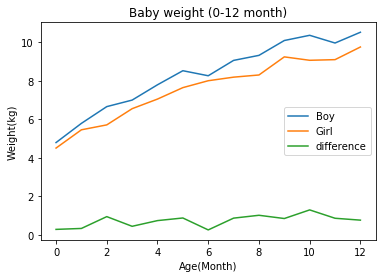

In [53]:
l1,=plt.plot(month,boyWeightMean,label='Boy')
l2,=plt.plot(month,girlWeightMean,label='Girl')
l3,=plt.plot(month,boyWeightMean-girlWeightMean,label='difference')
plt.legend(loc='right')
plt.xlabel('Age(Month)')
plt.ylabel('Weight(kg)')
plt.title('Baby weight (0-12 month)')
plt.show()

 (with seaborn) Make a scatterplot with linear regression lines for the baby boys’
relationship between age and wt, and the baby girls’ relationship between age and wt.

Text(0.5,1,'Body Weight of Male Baby')

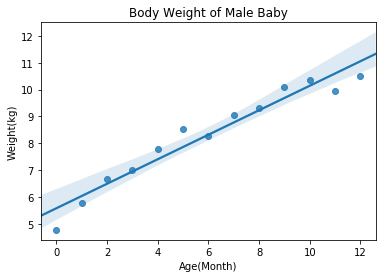

In [54]:
tempPlot = sns.regplot(x=month,y=boyWeightMean)
tempPlot.set_xlabel('Age(Month)')
tempPlot.set_ylabel('Weight(kg)')
tempPlot.set_title('Body Weight of Male Baby')


Text(0.5,1,'Body Weight of Female Baby')

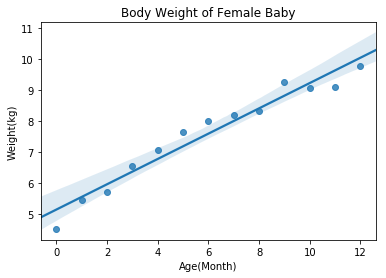

In [55]:
tempPlot = sns.regplot(x=month,y=girlWeightMean)
tempPlot.set_xlabel('Age(Month)')
tempPlot.set_ylabel('Weight(kg)')
tempPlot.set_title('Body Weight of Female Baby')